## To Calculate and Save Spectrograms

    Authors: Fernanda Ferreira and Victor Paganotto
    Professor: Tiago F. Tavares
    
    date: Sept/2019

#### Import Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob
import librosa
import librosa.display as ld
# Printa todos os valores do array
#np.set_printoptions(threshold=np.inf)
np.set_printoptions(threshold=10)
import pandas as pd
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
import os
import re
from sklearn.externals import joblib

/home/fernanda/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### To load records

In [2]:
# ------------------------- Completa -----------------------------------
#data_train = glob.glob('Novos_testes/Completa/Train/*.mp3')
#print (len(data_train))
#data_test = glob.glob('Novos_testes/Completa/Test/*.mp3')
#print (len(data_test))

# ------------------------- Trans_trans -----------------------------------
data_train = glob.glob('Novos_testes/T_T/Train/*.mp3')
print (len(data_train))
data_test = glob.glob('Novos_testes/T_T/Test/*.mp3')
print (len(data_test))

#-------------------------- NoTrans_trans --------------------------------
#data_train = glob.glob('Novos_testes/NT_T/Train/*.mp3')
#print (len(data_train))
#data_test = glob.glob('Novos_testes/NT_T/Test/*.mp3')
#print (len(data_test))

#---------------------------- Trans_NoTrans -------------------------------
# data_train = glob.glob('Novos_testes/T_NT/Train/*.mp3')
# print (len(data_train))
# data_test = glob.glob('Novos_testes/T_NT/Test/*.mp3')
# print (len(data_test))

367
367


In [31]:
def read_audios2(data):
    len_audios = []
    audios = []

    for file in data[0:5]:
        #input()
        audio, sr = librosa.core.load(file, sr=22050, mono=True, offset=0.0, duration=None)
        audio = (audio - np.mean(audio))/np.std(audio)
        len_audios.append(len(audio))
        audios.append(audio)
        
    max_audios = max(len_audios)
        
    return audios, max_audios

def my_specs_mel(audios, max_audios):
    specs = []
    for i in range(len(audios)):
        #input()
        i_audio = np.array(audios[i])
        i_audio.resize(max_audios)
                
        s = librosa.feature.melspectrogram(y=i_audio, sr=22050, S=None, n_fft=2048, hop_length=1024)
        print(s.shape)
        specs.append(s)
        
    return specs


In [32]:
audios_train, max_audios_train = read_audios2(data_train)
specs_train = my_specs_mel(audios_train, max_audios_train)

(128, 108)
(128, 108)
(128, 108)
(128, 108)
(128, 108)


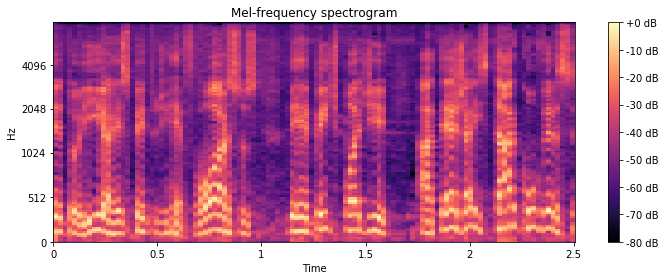

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
sb = librosa.power_to_db(specs_train[0], ref=np.max)
librosa.display.specshow(sb, x_axis='time',
                        y_axis='mel', sr=22050,
                        fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

In [4]:
def my_specs(audios, max_audios):
    specs = []
    hop_length = 400
    n_fft = 500

    for i in range(len(audios)):
        #shape = (max(len_audios))
        i_audio = np.array(audios[i])
        #i_audio.resize(shape)
        i_audio.resize(max_audios)
        x = np.abs(librosa.stft(i_audio, n_fft=n_fft, hop_length=hop_length))
        print ('x:', x.shape)
        X = librosa.amplitude_to_db(np.abs(x), ref=np.max)
        specs.append(X)
        #audios_resize.append(i_audio)
    return specs

#Librosa.stft return:
#np.ndarray [shape=(1 + n_fft/2, t), dtype=dtype]

In [14]:
def read_audios(data):
    len_audios = []
    audios = []

    for file in data[0:5]:
        input()
        audio, sr = librosa.core.load(file, sr=22050, mono=True, offset=0.0, duration=None)
        #print(len(audio))
        #print(len(audio), audio.shape)
#        len_audios.append(len(audio))
#        audios.append(audio)
        ######## 1 seg #######
        w = np.hanning((len(audio)*0.2)-1)
        print(len(w))
        plt.plot(w)
        plt.show()
        #audio_1 = audio *
        audio_1 = audio[0:int(len(audio)*0.2)]
        print(len(audio_1))
        plt.plot(audio_1)
        plt.show()
        audiow = audio_1 * w
        print(len(audiow))
        plt.plot(audiow)
        plt.show()
#       len_audios.append(len(audio_1))
#        audios.append(audio_1)
        #print (len(audio_1))
        #print (len(audio_1), audio_1.shape)
        ####### 0.75 ou 0.5 ######
        #audio_5 = audio_1[0:int(len(audio_1)*0.5)]
        #len_audios.append(len(audio_5))
        #audios.append(audio_5)
        #print(audio_75)
        #print(len(audio_5))#, audio_75.shape)
        
        
        
    max_audios = max(len_audios)
        
    return audios, max_audios

#To convert the hop length and frame size to units of seconds:
#print ("hop length[s]:", float(hop_length)/sr) # units of seconds
#print ("frame size[s]:",float(n_fft)/sr) # units of seconds


22027


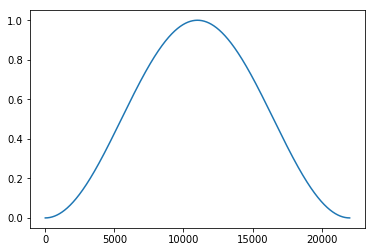

22027


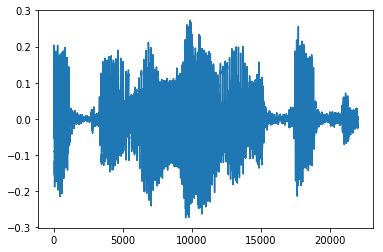

22027


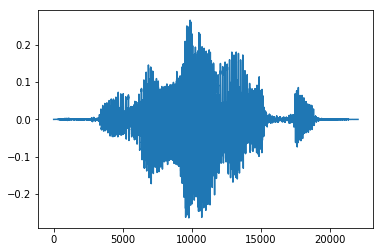


22027


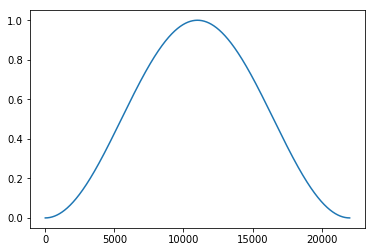

22027


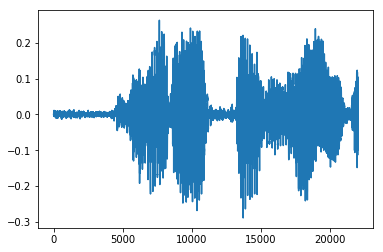

22027


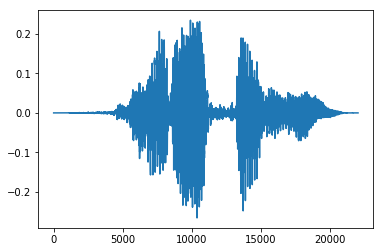

KeyboardInterrupt: 

In [15]:
audios_train, max_audios_train = read_audios(data_train)

In [9]:
audios_test, max_audios_test = read_audios(data_test)

11025
11013
11013
11185
11013


In [12]:
if max_audios_train > max_audios_test:
    specs_train = my_specs(audios_train, max_audios_train)
else:
    specs_train = my_specs(audios_train, max_audios_test)

x: (251, 28)
x: (251, 28)
x: (251, 28)
x: (251, 28)
x: (251, 28)


In [363]:
if max_audios_train > max_audios_test:
    x_test = my_specs(audios_test, max_audios_train)
else:
    x_test = my_specs(audios_test, max_audios_test)

In [364]:
#audios_train, max_audios_train = read_audios(data_train)

In [365]:
#specs_train = my_specs(audios_train, max_audios_train)

In [366]:
#audios_test, max_audios_test = read_audios(data_test)

In [367]:
#x_test = my_specs(audios_test, max_audios_train) #deixar todos do mesmo tamanho, verificado que o train contém o maior tempo de audio.

#### To load Labels

In [368]:
def read_labels(data):
    l = []
    for file in data:
        (dirname, sname) = os.path.split(file)
        (name, ext) = os.path.splitext(sname)
        n = re.split('-', name, flags=re.IGNORECASE)
        n2 = re.split('[0-9]+', n[0])
        #print (n[0])]
        #print (n2[1])
        l.append(n2[1])
    return l

In [369]:
def count_elements(seq) -> dict:
    """Tally elements from `seq`."""
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

In [370]:
l_train = read_labels(data_train)

In [371]:
y_test = read_labels(data_test)

In [372]:
l_count_train = count_elements(l_train)
l_count_test = count_elements(y_test)
print('Train:', l_count_train, 'Test:', l_count_test)

Train: {'P': 1026, 'NP': 1014} Test: {'P': 988, 'NP': 1009}


#### To separate 80% to train and 20% to validation

In [373]:
#stratify: certifica a mesma quantidade de audios de cada classe.
x_train, x_val, y_train, y_val = train_test_split(specs_train, l_train, test_size=0.2, stratify=l_train)


#### Transform labels in binary

In [374]:
# convert class vectors to binary class matrices
def string_to_binary(lista):
    
    for i in range(len(lista)):
        if lista[i] == 'P':
            lista[i] = 0
        elif lista[i] == 'NP':
            lista[i] = 1
    return lista

In [375]:
y_train_bi = string_to_binary(y_train)
#print (y_train_bi)

y_test_bi = string_to_binary(y_test)
#print (y_test_bi)

y_val_bi = string_to_binary(y_val)
#print (y_val_bi)



In [376]:
x_train_np = np.array(x_train)
x_test_np = np.array(x_test)
x_val_np = np.array(x_val)

y_train_np = np.array(y_train_bi)
y_test_np = np.array(y_test_bi)
y_val_np = np.array(y_val_bi)

print (x_train_np.shape, y_train_np.shape)
print (x_test_np.shape, y_test_np.shape)
print(x_val_np.shape, y_val_np.shape)

(1632, 251, 61) (1632,)
(1997, 251, 61) (1997,)
(408, 251, 61) (408,)


#### Save features

In [377]:
#-------------------- Trans_Trans-------------------------------------------------------------------
# joblib.dump(x_train_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/Trans_Trans/05seg/x_train.pkl")
# joblib.dump(x_test_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/Trans_Trans/05seg/x_test.pkl")
# joblib.dump(x_val_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/Trans_Trans/05seg/x_val.pkl")
# joblib.dump(y_train_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/Trans_Trans/05seg/y_train.pkl")
# joblib.dump(y_test_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/Trans_Trans/05seg/y_test.pkl")
# joblib.dump(y_val_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/Trans_Trans/05seg/y_val.pkl")

# ---------------------- Completa -------------------------------------------------------------------
# joblib.dump(x_train_np, "Propagandas_dataset/features_propaganda_50_50/Completa/1segs/x_train.pkl")
# joblib.dump(x_test_np, "Propagandas_dataset/features_propaganda_50_50/Completa/1segs/x_test.pkl")
# joblib.dump(x_val_np, "Propagandas_dataset/features_propaganda_50_50/Completa/1segs/x_val.pkl")
# joblib.dump(y_train_np, "Propagandas_dataset/features_propaganda_50_50/Completa/1segs/y_train.pkl")
# joblib.dump(y_test_np, "Propagandas_dataset/features_propaganda_50_50/Completa/1segs/y_test.pkl")
# joblib.dump(y_val_np, "Propagandas_dataset/features_propaganda_50_50/Completa/1segs/y_val.pkl")

#-------------------------- NoTrans_trans -------------------------------------------------------------
# joblib.dump(x_train_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/NoTrans_Trans/05seg/x_train.pkl")
# joblib.dump(x_test_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/NoTrans_Trans/05seg/x_test.pkl")
# joblib.dump(x_val_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/NoTrans_Trans/05seg/x_val.pkl")
# joblib.dump(y_train_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/NoTrans_Trans/05seg/y_train.pkl")
# joblib.dump(y_test_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/NoTrans_Trans/05seg/y_test.pkl")
# joblib.dump(y_val_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/NoTrans_Trans/05seg/y_val.pkl")

# ---------------------------- Trans_NoTrans --------------------------------------------------------------
#joblib.dump(x_train_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/Trans_NoTrans/05seg/x_train.pkl")
#joblib.dump(x_test_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/Trans_NoTrans/05seg/x_test.pkl")
#joblib.dump(x_val_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/Trans_NoTrans/05seg/x_val.pkl")
#joblib.dump(y_train_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/Trans_NoTrans/05seg/y_train.pkl")
#joblib.dump(y_test_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/Trans_NoTrans/05seg/y_test.pkl")
#joblib.dump(y_val_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/Trans_NoTrans/05seg/y_val.pkl")

# --------------------------- Completa -------------------------------------------------------------
joblib.dump(x_train_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/Completa/05seg/x_train.pkl")
joblib.dump(x_test_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/Completa/05seg/x_test.pkl")
joblib.dump(x_val_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/Completa/05seg/x_val.pkl")
joblib.dump(y_train_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/Completa/05seg/y_train.pkl")
joblib.dump(y_test_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/Completa/05seg/y_test.pkl")
joblib.dump(y_val_np, "Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/Completa/05seg/y_val.pkl")

['Propagandas_dataset/features_propaganda_50_50/Dataset_5SEG/Completa/05seg/y_val.pkl']